In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.rand(100, 1) generates 100 random numbers between 0 and 1, shaped as a column vector (100 rows × 1 column).

Multiplying by 6 scales them to the range [0, 6).

Subtracting 3 shifts the range to [-3, 3), so X contains 100 random values between -3 and +3.

Text(0, 0.5, 'Y dataset')

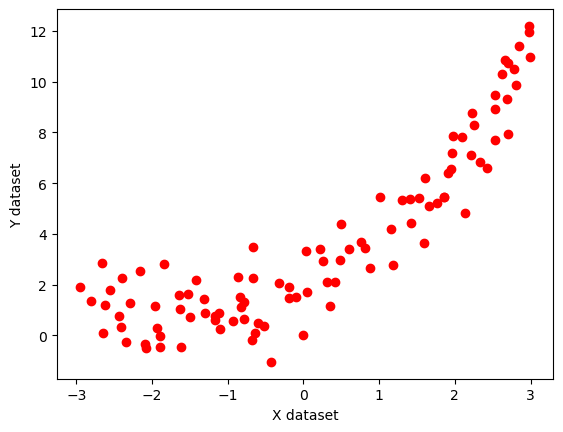

In [3]:
X = 6 * np.random.rand(100,1)-3
y = 0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)

# quadratic equation used - y = 0.5x^2 + 1.5x + 2 + outliers
plt.scatter(X,y,color='r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

This code generates noisy data from a quadratic function and plots it as a scatter plot — useful for testing polynomial regression models.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
## Lets implement
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [11]:
X_train

array([[-1.30583862],
       [-0.00352879],
       [ 2.97431795],
       [ 1.6575886 ],
       [-2.09265222],
       [-2.43035425],
       [ 1.5211577 ],
       [ 0.49555026],
       [-2.64468886],
       [-2.29358323],
       [ 2.69323192],
       [ 1.97776099],
       [ 2.77887559],
       [ 0.88253567],
       [-0.66413213],
       [ 2.98358734],
       [-1.93245027],
       [-0.64107286],
       [-1.1133048 ],
       [-1.96625801],
       [-1.17236565],
       [ 1.59932859],
       [-1.88924245],
       [-2.62724971],
       [-2.55478877],
       [ 0.21622803],
       [ 1.16312166],
       [-0.67834413],
       [-1.41727791],
       [-1.31879359],
       [ 2.69926831],
       [-0.32314242],
       [ 2.61772416],
       [ 1.96062313],
       [-0.84019552],
       [-2.39102515],
       [-0.19156387],
       [-0.83068837],
       [-0.18722204],
       [-2.41038551],
       [ 1.59328224],
       [-1.63194141],
       [-2.80425175],
       [-2.66438407],
       [ 1.85698979],
       [ 0

In [8]:
regression.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(X_test))
print(score)

0.7830087971667611


Let's visualize the model

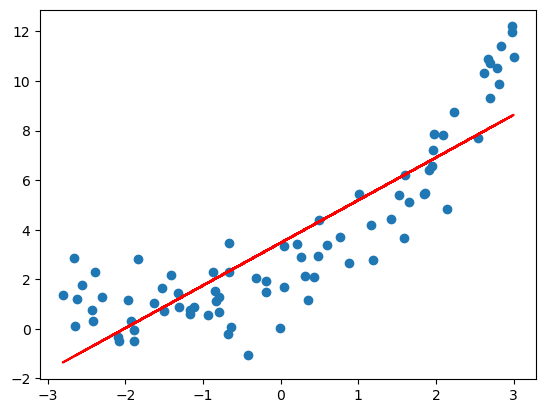

In [12]:
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)

Polynomial regression extends linear regression by adding polynomial features 
of the input variables. For example, for degree 2, the model is:
    
    hθ (x)= β0 + β1x + β2x^2
    
Polynomial Features  are used to increase the degree which is for
transformations


In [15]:
# Lets apply Polynomial transformation
from sklear.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

include_bias : bool, default=True
    If `True` (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [19]:
X_train_poly

array([[ 1.00000000e+00, -1.30583862e+00,  1.70521449e+00],
       [ 1.00000000e+00, -3.52879433e-03,  1.24523894e-05],
       [ 1.00000000e+00,  2.97431795e+00,  8.84656726e+00],
       [ 1.00000000e+00,  1.65758860e+00,  2.74759995e+00],
       [ 1.00000000e+00, -2.09265222e+00,  4.37919332e+00],
       [ 1.00000000e+00, -2.43035425e+00,  5.90662177e+00],
       [ 1.00000000e+00,  1.52115770e+00,  2.31392076e+00],
       [ 1.00000000e+00,  4.95550258e-01,  2.45570058e-01],
       [ 1.00000000e+00, -2.64468886e+00,  6.99437919e+00],
       [ 1.00000000e+00, -2.29358323e+00,  5.26052405e+00],
       [ 1.00000000e+00,  2.69323192e+00,  7.25349818e+00],
       [ 1.00000000e+00,  1.97776099e+00,  3.91153852e+00],
       [ 1.00000000e+00,  2.77887559e+00,  7.72214953e+00],
       [ 1.00000000e+00,  8.82535672e-01,  7.78869213e-01],
       [ 1.00000000e+00, -6.64132128e-01,  4.41071483e-01],
       [ 1.00000000e+00,  2.98358734e+00,  8.90179339e+00],
       [ 1.00000000e+00, -1.93245027e+00

In [20]:
X_test_poly 

array([[ 1.00000000e+00,  2.33315801e+00,  5.44362632e+00],
       [ 1.00000000e+00, -5.25522524e-01,  2.76173923e-01],
       [ 1.00000000e+00,  2.25165004e+00,  5.06992790e+00],
       [ 1.00000000e+00, -2.34829289e+00,  5.51447951e+00],
       [ 1.00000000e+00,  2.70455199e+00,  7.31460144e+00],
       [ 1.00000000e+00, -2.95685873e+00,  8.74301355e+00],
       [ 1.00000000e+00, -1.64934988e+00,  2.72035503e+00],
       [ 1.00000000e+00,  8.10903073e-01,  6.57563794e-01],
       [ 1.00000000e+00,  2.20877888e+00,  4.87870412e+00],
       [ 1.00000000e+00, -9.28519149e-02,  8.62147810e-03],
       [ 1.00000000e+00,  1.76588424e+00,  3.11834715e+00],
       [ 1.00000000e+00, -2.15618810e+00,  4.64914713e+00],
       [ 1.00000000e+00,  2.53050705e+00,  6.40346592e+00],
       [ 1.00000000e+00,  2.53579554e+00,  6.43025900e+00],
       [ 1.00000000e+00, -1.10457739e+00,  1.22009122e+00],
       [ 1.00000000e+00,  2.42303124e+00,  5.87108041e+00],
       [ 1.00000000e+00,  1.30064702e+00

In [24]:
from sklearn.metrics import r2_score
regression_1 = LinearRegression()
regression_1.fit(X_train_poly,y_train)
y_pred = regression_1.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9047150420275611


In [26]:
print(regression_1.coef_)

[[0.         1.53839993 0.53181283]]


In [27]:
print(regression_1.intercept_)

[1.84032565]


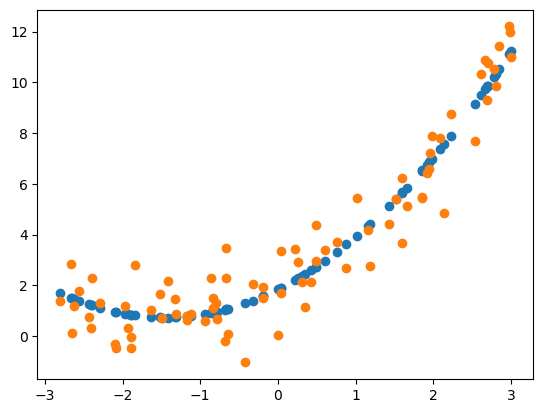

In [29]:
plt.scatter(X_train,regression_1.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [33]:
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [34]:
X_train_poly

array([[ 1.00000000e+00, -1.30583862e+00,  1.70521449e+00,
        -2.22673494e+00],
       [ 1.00000000e+00, -3.52879433e-03,  1.24523894e-05,
        -4.39419212e-08],
       [ 1.00000000e+00,  2.97431795e+00,  8.84656726e+00,
         2.63125038e+01],
       [ 1.00000000e+00,  1.65758860e+00,  2.74759995e+00,
         4.55439035e+00],
       [ 1.00000000e+00, -2.09265222e+00,  4.37919332e+00,
        -9.16412864e+00],
       [ 1.00000000e+00, -2.43035425e+00,  5.90662177e+00,
        -1.43551833e+01],
       [ 1.00000000e+00,  1.52115770e+00,  2.31392076e+00,
         3.51983838e+00],
       [ 1.00000000e+00,  4.95550258e-01,  2.45570058e-01,
         1.21692306e-01],
       [ 1.00000000e+00, -2.64468886e+00,  6.99437919e+00,
        -1.84979567e+01],
       [ 1.00000000e+00, -2.29358323e+00,  5.26052405e+00,
        -1.20654498e+01],
       [ 1.00000000e+00,  2.69323192e+00,  7.25349818e+00,
         1.95353528e+01],
       [ 1.00000000e+00,  1.97776099e+00,  3.91153852e+00,
      

In [36]:
from sklearn.metrics import r2_score
regression_1 = LinearRegression()
regression_1.fit(X_train_poly,y_train)
y_pred = regression_1.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.8967221414798296
